<a href="https://colab.research.google.com/github/victorcaquilpan/RemovingGreenBackground/blob/main/Removing_GreenBackGround.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

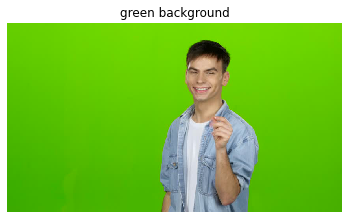

(480, 852, 3)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage import io

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

def display(img, caption=''):
    # Show image using pyplot 
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

image1 = io.imread('GreenBackGround.jpg')
display(image1, 'green background')
print(image1.shape)

In [2]:
# We can check the values of each pixel in each band
image1[:,:,1]

array([[206, 206, 206, ..., 210, 210, 210],
       [206, 206, 206, ..., 210, 210, 210],
       [206, 206, 206, ..., 210, 210, 210],
       ...,
       [170, 170, 170, ..., 175, 175, 175],
       [170, 170, 170, ..., 175, 175, 175],
       [170, 170, 170, ..., 175, 175, 175]], dtype=uint8)

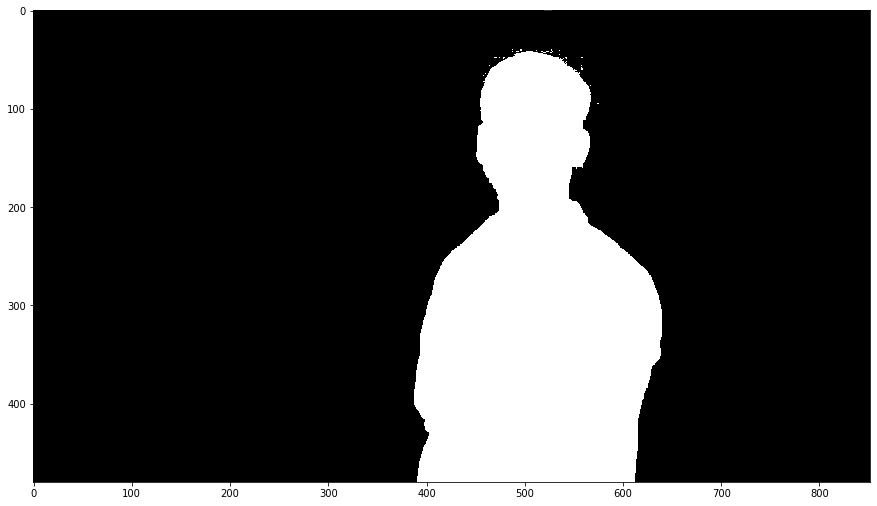

In [3]:
# We can identify specific values of the green background
green_mask = (image1[:,:,0] >= 55) & (image1[:,:,0] <= 120) & (image1[:,:,1] >= 170) & (image1[:,:,1] <= 220) & (image1[:,:,2] <= 10)
green_mask

# Create a copy of the original image
filtered_image = image1.copy()

# Now, we can create the mask
filtered_image[green_mask] = 0
filtered_image[~green_mask] = 255
plt.figure(figsize=(15,15))
plt.imshow(filtered_image)

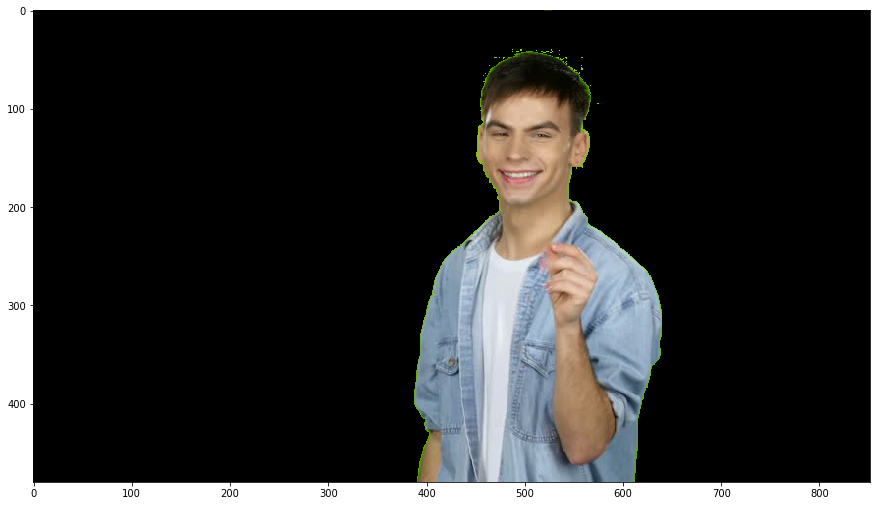

In [4]:
# We can display the guy using our filter
first_process_image = image1.copy()
first_process_image[np.where(filtered_image == 0)] = 0
plt.figure(figsize=(15,15))
plt.imshow(first_process_image)

# We can check that there are some points in the hair og the guy that makes noise. In addition there is a gren border surrounded the guy. We can use morphology processes to remove them.

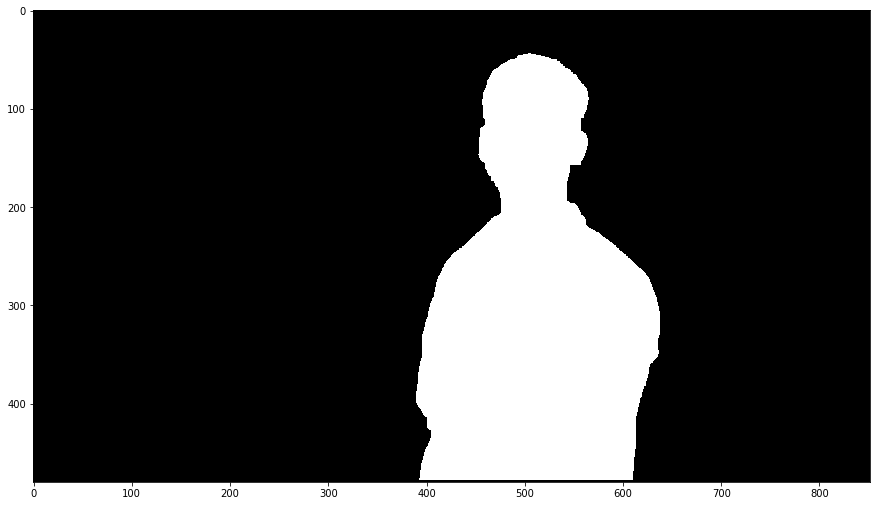

In [16]:
# First, we can use erosion to remove small elements. 
# Ref: https://medium.com/@ami25480/morphological-image-processing-operations-dilation-erosion-opening-and-closing-with-and-without-c95475468fca

#Acquire size of the original image
m,n,z = filtered_image.shape

# We create a matrix of size 5 as the kernel
fix_kernel = np.ones((5,5), np.uint8)
constant = (5-1)//2

#Define new image
img_erode= np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= filtered_image[i-constant:i+constant+1, j-constant:j+constant+1,0] # We can only use 1 band
    product= temp*fix_kernel
    img_erode[i,j]= np.min(product)

# Display output
plt.figure(figsize=(15,15))
plt.imshow(img_erode)


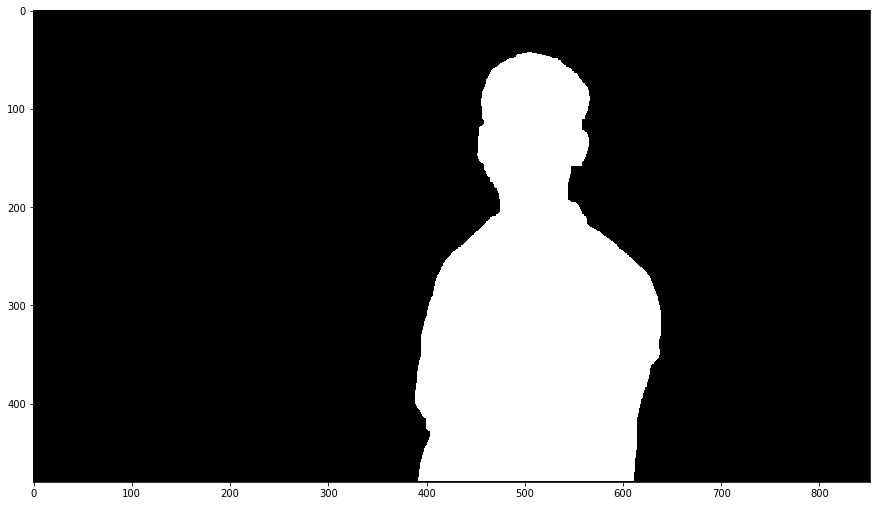

In [20]:
# Now, we can do the process of dilation to get the original size of the guy

# Acquire size of the image
p,q,z = filtered_image.shape

# Define new image to store the pixels of dilated image
img_dilation = np.zeros((p,q), dtype=np.uint8)
                     
# Define the structuring element 
dilation_kernel = np.array([[0,1,0], [1,1,1],[0,1,0]])
constant1=1

# Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp= img_erosion[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product= temp*dilation_kernel
    img_dilation[i,j]= np.max(product)

# Display outpout
plt.figure(figsize=(15,15))
plt.imshow(img_dilation)

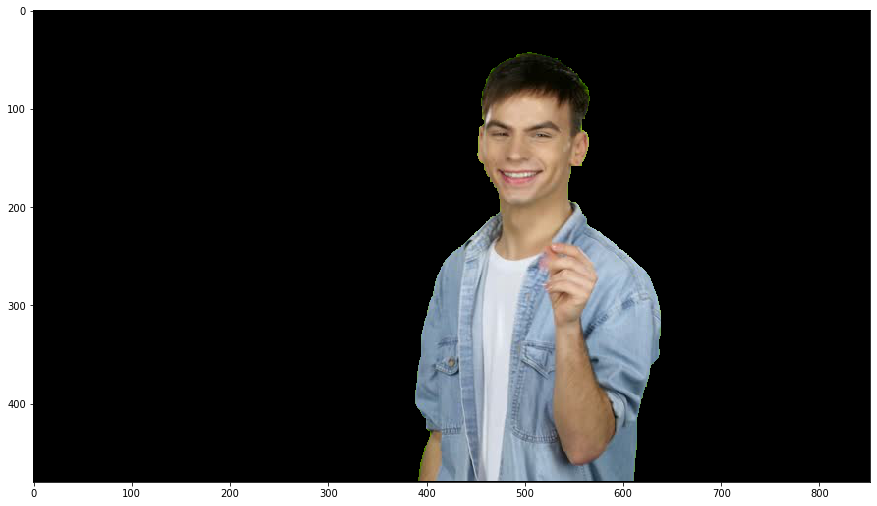

In [21]:
# We check wheter our mask is ok or not
after_morpho = image1.copy()
after_morpho[np.where(img_dilation == 0)] = 0
plt.figure(figsize=(15,15))
plt.imshow(after_morpho)

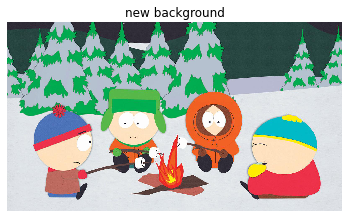

(900, 1600, 3)


In [22]:
# Now, we can load the new background
image2 = io.imread('NewBackGround.jpg')
display(image2, 'new background')
print(image2.shape) 

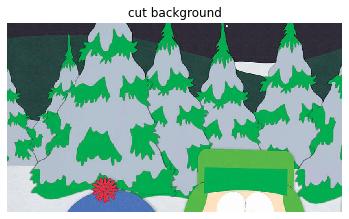

(480, 852, 3)


In [23]:
# We go to cut the new image to the dimmension of our original image
image2_cut = image2[:image1.shape[0],:image1.shape[1],:].copy()
display(image2_cut, 'cut background')
print(image2_cut.shape) 

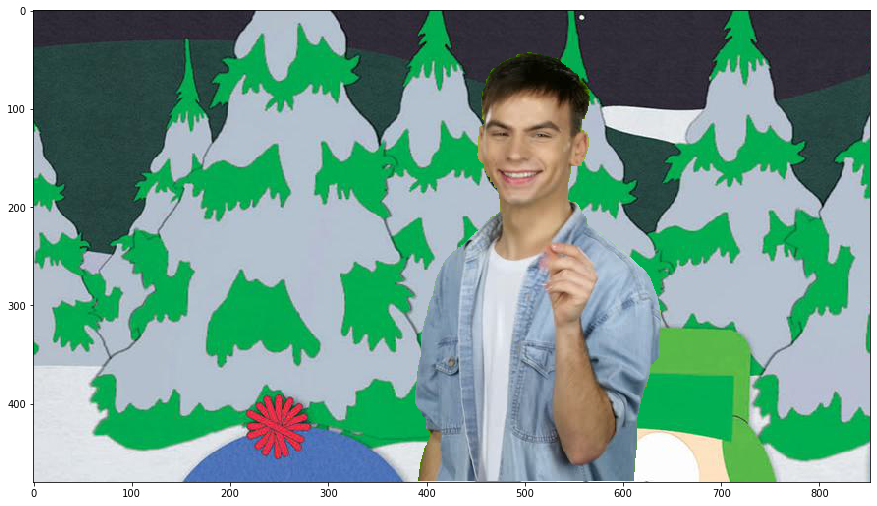

In [24]:
# Replace black pixels by the new background
new_image = image2_cut.copy()
new_image[np.where(img_dilation == 255)] = image1[np.where(img_dilation == 255)]
plt.figure(figsize=(15,15))
plt.imshow(new_image)

# This is the final output of our entire process